In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris
from poliastro.bodies import Sun,Earth,Jupiter
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver
from poliastro.iod import izzo
from poliastro.plotting import plot, OrbitPlotter
from poliastro.util import norm
solar_system_ephemeris.set('jpl')



<ScienceState solar_system_ephemeris: 'jpl'>

In [13]:
date_launch = Time("2011-08-05 16:25", scale='utc')
C_3 = 31.1*u.km**2/u.s**2
date_flyby = Time("2013-10-09 19:21",scale='utc')
date_arrival = Time("2016-07-05 03:18", scale='utc')


In [14]:
ss_e0 = Orbit.from_body_ephem(Earth, date_launch,)
r_e0,v_e0 = ss_e0.rv()

C:\Users\mwood\AppData\Local\Programs\Python\Python36-32\lib\site-packages\poliastro\twobody\orbit.py:157: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2011-08-05 16:26:06.183. Use Time(..., scale='tdb') instead.



In [15]:
ss_efly = Orbit.from_body_ephem(Earth, date_flyby)
r_efly, v_efly = ss_efly.rv()

C:\Users\mwood\AppData\Local\Programs\Python\Python36-32\lib\site-packages\poliastro\twobody\orbit.py:157: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2013-10-09 19:22:07.182. Use Time(..., scale='tdb') instead.



In [16]:
dv = C_3**.5*v_e0 / norm(v_e0)
man = Maneuver.impulse(dv)

In [17]:
ic1 = ss_e0.apply_maneuver(man)
ic1.rv()

(<Quantity [  1.02465527e+08, -1.02313505e+08, -4.43533465e+07] km>,
 <Quantity [ 2198705.82621214, 1897186.74383867,  822370.88977492] km / d>)

In [18]:
ic1.period.to(u.year)

<Quantity 2.1515473614473146 yr>

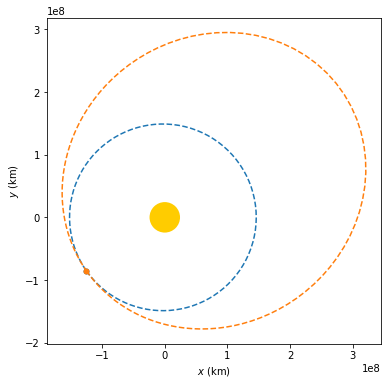

In [19]:
op = OrbitPlotter()
op.plot(ss_e0)
op.plot(ic1)


In [20]:
ss_aph = ic1.propagate(ic1.period/2)
ss_aph.epoch

<Time object: scale='tdb' format='iso' value=2012-09-01 14:40:01.690>

In [21]:
time_of_flight = date_flyby - ss_aph.epoch
time_of_flight

<TimeDelta object: scale='tai' format='jd' value=403.1958969055241>

In [22]:
(v_aph, v_fly), = izzo.lambert(Sun.k, ss_aph.r, ss_efly.r, time_of_flight)

In [24]:
norm(v_aph - ss_aph.v)

<Quantity 1.0798659566541928 km / s>

In [25]:
ss_aph_post = Orbit.from_vectors(Sun, ss_aph.r, v_aph, epoch=ss_aph.epoch)
ss_junofly = Orbit.from_vectors(Sun, r_efly, v_fly, epoch=date_flyby)

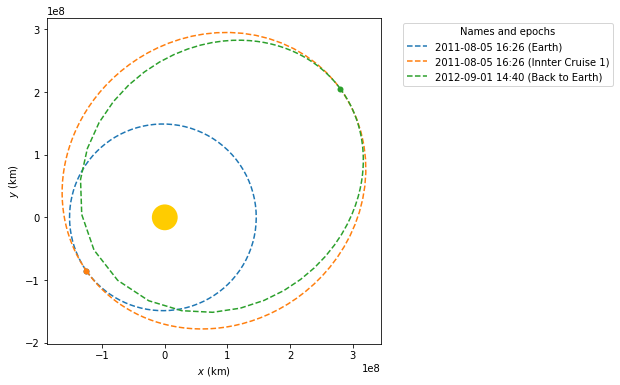

In [26]:
op = OrbitPlotter()
op.plot(ss_e0, label="Earth")
op.plot(ic1,label="Innter Cruise 1")
op.plot(ss_aph_post,label="Back to Earth")

In [28]:
ss_j = Orbit.from_body_ephem(Jupiter, date_arrival)
r_j, v_j = ss_j.rv()

C:\Users\mwood\AppData\Local\Programs\Python\Python36-32\lib\site-packages\poliastro\twobody\orbit.py:157: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2016-07-05 03:19:08.184. Use Time(..., scale='tdb') instead.



In [29]:
(v_flypre, v_oip), = izzo.lambert(Sun.k, r_efly, r_j, date_arrival - date_flyby)

In [30]:
ss_oip = Orbit.from_vectors(Sun, r_j, v_oip, epoch=date_flyby)

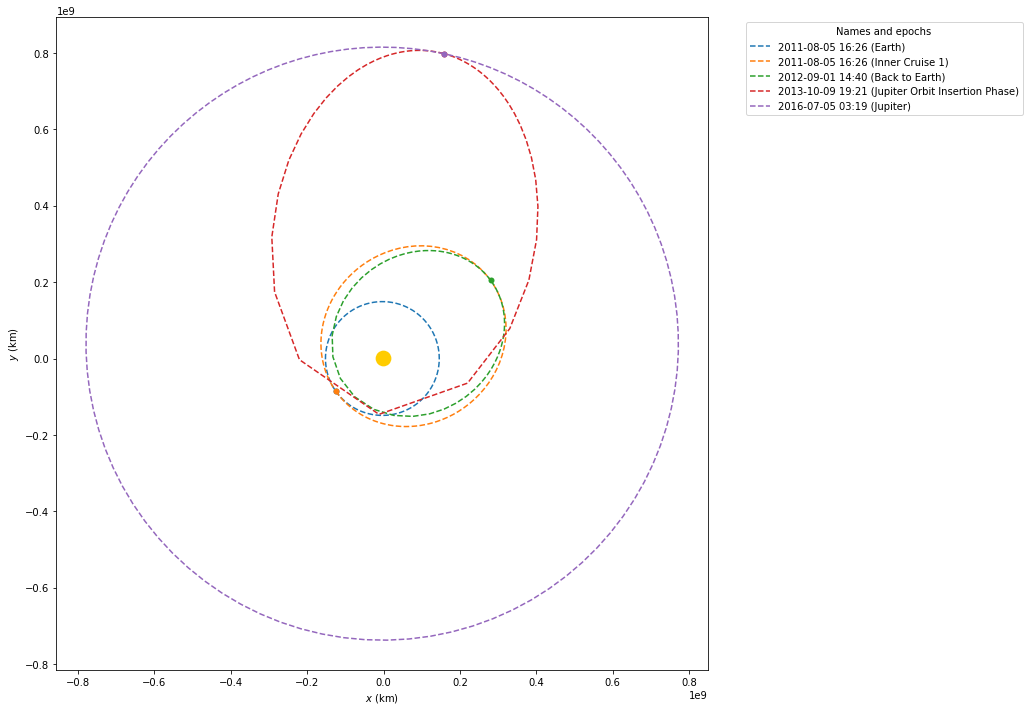

In [31]:
fig, ax = plt.subplots(figsize=(9, 12))

op = OrbitPlotter(ax)

op.plot(ss_e0, label="Earth")
op.plot(ic1, label="Inner Cruise 1")
#op.plot(ss_efly)
op.plot(ss_aph_post, label="Back to Earth")
op.plot(ss_oip, label="Jupiter Orbit Insertion Phase")
op.plot(ss_j, label="Jupiter")